# Basic Decision Tree
What I feel taht, best way to learn and understand any new machine learning method is to sit down and implement the algorithm.
Here It is , a very simple and easily understandable way to implement a  Decision Tree Algorithm.

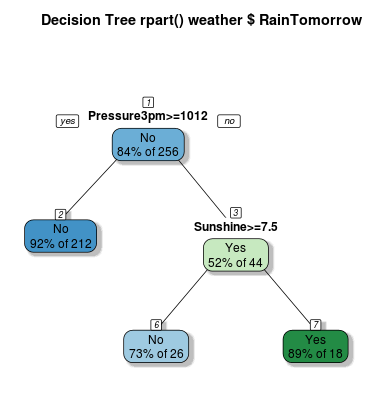

In [12]:
from IPython.display import Image                        
url='https://raw.githubusercontent.com/Lightning-Bug/ML-Starter-Pack/master/Decision%20Tree%20Classifier/Images/TreeSample.png'
Image(url,width=400, height=400)

##### Shown Above Image Is just an Example of how Our Decision Tree will look but with Different Parameters and different number of branches
Lets go to the code part now.

Let’s imagine we want to predict rain (1) and no-rain (0) for a given day. We have two predictors:

   - **x1** is weather type (0 = partly cloudy, 1 = cloudy, 2 = sunny)
   - **x2** is atmospheric pressure (0 = low, 1 = high)


In [1]:
import numpy as np
x1 = [0, 1, 1, 2, 2, 2]
x2 = [0, 0, 1, 1, 1, 0]
y = np.array([0, 0, 0, 1, 1, 0])

The idea behind **Decision trees** is that, given our training set, the method learns a set of rules that help us classify a new example. 
An example rule could be: if the weather is partly cloudy and pressure is low, then it’s going to rain.
And a few more examples you can add according to your knowledge of rain and its relation with pressure :p

In [2]:
def partition(a):
    return {c: (a==c).nonzero()[0] for c in np.unique(a)}

The idea is to split the data according to one (or multiple) attributes, so that we end up with sub-sets that (ideally) have a single outcome.

For example, if we split our training data by the attribute x1, we end up with **3 sets**, and you can see how two of the splittings are **pure, as they contain only zeros.**

   - x1 = 0: y = [0]
   - x1 = 1: y = [0, 0]
   - x1 = 2: y = [1, 1, 0]
     
The splitting for **x1 = 2** is unfortunately not pure, therefore we need to split this set into even more subsets.

The code for splitting a set is fairly simple: the following routine takes an array as input and returns a dictionary that **maps each unique value to its indices.**


### Picking which attribute to split

An aspect that we need to figure out still is how to pick which attribute to use for the splitting. Ideally, we want the attribute that give us the better (purest) splits.

A standard measure of **“Purity”** can be obtained by taking the opposite of a quantity called Shannon entropy (if you’ve ever taken thermodynamics, you’ll know that entropy, is a measure of “Disorder” in a system).

Let’s assume we have a urn with red and green balls, we want a quantity that should be at its minimum when the urn is filled completely with green or red balls (min disorder),and at its minimum when we got half green and half red balls (maximum disorder). Given that $f_g$ is the fraction of green balls and $f_r$ is the fraction of red balls, taking the opposite of H

satisfies this property:
** H = − $f_r$log2($f_r$)−$f_g$log2($f_g$)**

In [3]:
def entropy(s):
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    for p in freqs:
        if p != 0.0:
            res -= p * np.log2(p)
    return res

You can see, in fact,
−1*log2(1)−0*log2(0)=0 

−0.5*log2(0.5)−0.5*log2(0.5)=1

Therefore Tricks for you :
 - If both are **same** the entropy is **1.**
 - If any one is **zero**, then entropy is **0.**
 
Now that we have a measure of purity, to select the most convenient attribute for splitting, we should check if the sets improves the purity than the un-splitted set.

This measure of purity improvement can be described mathematically through a quantity called mutual information (in the decision tree literature this is often referred as information gain).

Mutual information is the difference between the entropy of the unsplitted set, and the average of the entropy of each split, weighted by the number of elements in the subset. A concrete example is as follows:
I(y,x)=H(y)−[px=0H(y|x=0)+px=1H(y|x=1))]

where:
- y is the original set
- x is the attribute we are using for splitting that assumes the values {0, 1}
- H(y∥x=k) is the entropy of the subset that corresponds to the attribute value x=k, and px=k is the proportion of elements in that subset. The implementation is again straightforward.

In [4]:

def mutual_information(y, x):

    res = entropy(y)

    # We partition x, according to attribute values x_i
    val, counts = np.unique(x, return_counts=True)
    freqs = counts.astype('float')/len(x)

    # We calculate a weighted average of the entropy
    for p, v in zip(freqs, val):
        res -= p * entropy(y[x == v])

    return res

To summarize, the general idea is as follow:

   - Select the most convenient attribute using the mutual information criterion.
   - Split using the selected attribute
   - For every subset, if the subset is not pure (or empty), recursively split this subset by picking another attribute (until you ran out of attributes).


In [8]:
from pprint import pprint

def is_pure(s):
    return len(set(s)) == 1

def recursive_split(x, y):
    # If there could be no split, just return the original set
    if is_pure(y) or len(y) == 0:
        return y

    # We get attribute that gives the highest mutual information
    gain = np.array([mutual_information(y, x_attr) for x_attr in x.T])
    selected_attr = np.argmax(gain)

    # If there's no gain at all, nothing has to be done, just return the original set
    if np.all(gain < 1e-6):
        return y


    # We split using the selected attribute
    sets = partition(x[:, selected_attr])

    res = {}
    for k, v in sets.items():
        y_subset = y.take(v, axis=0)
        x_subset = x.take(v, axis=0)

        res["x_%d = %d" % (selected_attr, k)] = recursive_split(x_subset, y_subset)

    return res

X = np.array([x1, x2]).T
pprint(recursive_split(X, y))

{'x_0 = 0': array([0]),
 'x_0 = 1': array([0, 0]),
 'x_0 = 2': {'x_1 = 0': array([0]), 'x_1 = 1': array([1, 1])}}


**There’s much more about decision trees, but with these building blocks you've got a kick start and its not too hard to understand how to go about it, So, just go and Explore :) **
